Usando el modulo _Python_ `graphviz`, clases para insertar, buscar y dibujar un arbol 2,3.

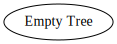

In [1]:
import graphviz
from IPython.display import display_svg, SVG, display

class tree:
  def __init__(self, root = None):
    self.root = root
  def __str__(self):
    if self.root == None:
      return ""
    else:
      return str(self.root)
  def draw(self):
    display = graphviz.Digraph()
    display.format = 'svg'
    if self.root == None:
      display.node("Empty Tree")
    else:
      self.root.draw(display)
    svg = display.pipe().decode('utf-8')
    return SVG(svg)
  def search(self,x):
    """Returns a list of all the values associated to the key _x_."""
    if self.root == None:
      return []
    else:
      return self.root.search(x)
  def insert(self,key,info):
    """Inserts the pair (key,info) in the tree."""
    # print("Adding ["+str(key)+","+str(info)+"]:")
    if self.root == None:
      self.root = leaf(key,info)
    else:
      (left,key,right) = self.root.insert(key,info)
      if key == None:
        self.root = left
      else:
        self.root = binaryNode(left,key,right)
    return self.draw()

class binaryNode:
  def __init__(self,left,key,right):
    assert left != None
    assert right != None
    self.key = key
    self.left = left
    self.right = right
  def __str__(self):
    return "bin("+str(self.left)+","+str(self.key)+","+str(self.right)+")"
  def draw(self,display):
    self.left.draw(display)
    display.node(str(self),str(self.key))
    self.right.draw(display)
    display.edge(str(self),str(self.left))
    display.edge(str(self),str(self.right))
  def search(self,x):
    if x<self.key:
      return self.left.search(x)
    else:
      return self.right.search(x)
  def insert(self,key,info):
    """Inserts the pair (key,info) in a binary node."""
    if key<self.key:
      (left,upkey,right) = self.left.insert(key,info)
      if upkey == None:
        self.left = left
        return (self, None, None)
      else: 
        assert upkey < self.key
        return (
            ternaryNode(left,upkey,right,self.key,self.right), 
            None, 
            None
        )
    else:
      (left,upkey,right) = self.right.insert(key,info)
      if upkey == None:
        self.right = left
        return (self, None, None)
      else:
        assert upkey>self.key
        return (
              ternaryNode(self.left,self.key,left,upkey,right), 
              None, 
              None
        )

class ternaryNode:
  def __init__(self,left,leftKey,center,rightKey,right):
    assert left != None
    assert center != None
    assert right != None
    self.leftKey = leftKey
    self.rightKey = rightKey
    self.left = left
    self.center = center
    self.right = right
  def __str__(self):
    return "ter("+str(self.left)+","+str(self.leftKey)+","+str(self.center)+","+str(self.rightKey)+","+str(self.right)+")"
  def draw(self,display):
    display.node(str(self),str(self.leftKey)+","+str(self.rightKey))
    self.left.draw(display)
    display.edge(str(self),str(self.left))
    self.center.draw(display)
    display.edge(str(self),str(self.center))
    self.right.draw(display)
    display.edge(str(self),str(self.right))
  def search(self,x):
    if x<self.leftKey:
      return self.left.search(x)
    elif x<self.rightKey:
      return self.center.search(x)
    else:
      return self.right.search(x)
  def insert(self,key,info):
    """Inserts the pair (key,info) in a ternary node."""
    if key<self.leftKey:
      (left,upkey,right) = self.left.insert(key,info)
      if upkey == None:
        self.left = left
        return (self, None, None)
      else: 
        assert upkey < self.leftKey
        return (
            binaryNode(left,upkey,right),
            self.leftKey,
            binaryNode(self.center,self.rightKey,self.right)
        )
    elif key<self.rightKey:
      (left,upkey,right) = self.center.insert(key,info)
      if upkey == None:
        self.center = left
        return (self, None, None)
      else:
        assert upkey>self.leftKey and upkey<self.rightKey
        return (
            binaryNode(self.left,self.leftKey,left),
            upkey,
            binaryNode(right,self.rightKey,self.right)
        )
    else:
      left,upkey,right = self.right.insert(key,info)
      if upkey == None:
        self.right = left
        return (self, None, None)
      else:
        assert upkey>self.rightKey
        return (
            binaryNode(self.left,self.leftKey,self.center),
            self.rightKey,
            binaryNode(left,upkey,right)
        )

class leaf:
  def __init__(self,key,info):
      self.key = key
      self.info = info
  def __str__(self):
    return "["+str(self.key)+","+str(self.info)+"]"
  def draw(self,display):
    display.node(str(self))
  def search(self,x):
    if self.key == x:
      return [self.info]
    else:
      return []
  def insert(self,key,info):
    """Inserts the pair (key,info) in a tree formed only of a leaf."""
    if key<self.key:
      return (leaf(key,info),self.key,self)
    else:
      return (self,key,leaf(key,info))


arbol = tree()
arbol.draw()

### Secuencia de inserciones

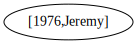

In [2]:
arbol.insert(1976,"Jeremy")

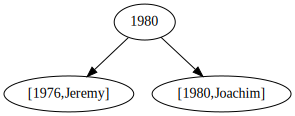

In [3]:
arbol.insert(1980,"Joachim")

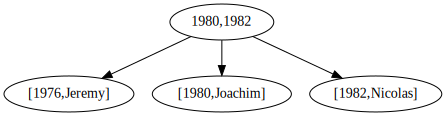

In [4]:
arbol.insert(1982,"Nicolas")

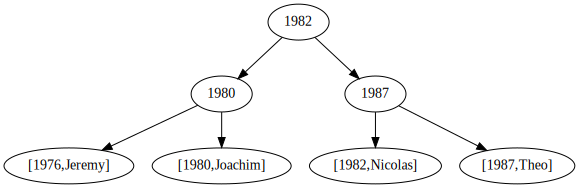

In [5]:
arbol.insert(1987,"Theo")

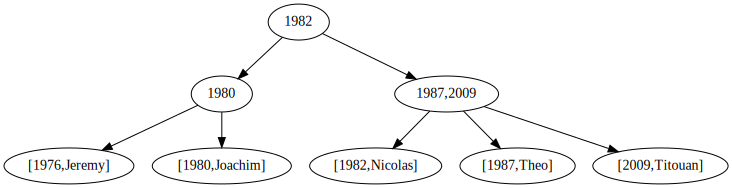

In [6]:
arbol.insert(2009,"Titouan")

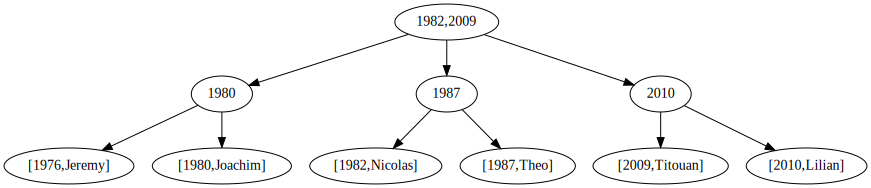

In [7]:
arbol.insert(2010,"Lilian")

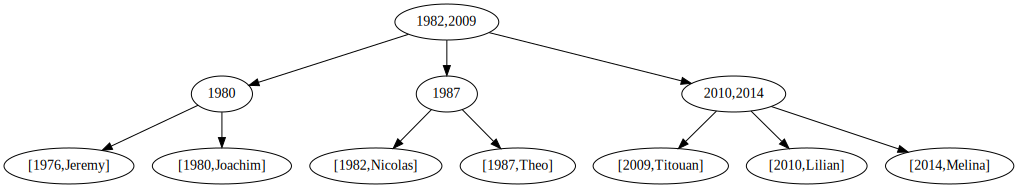

In [8]:
arbol.insert(2014,"Melina")

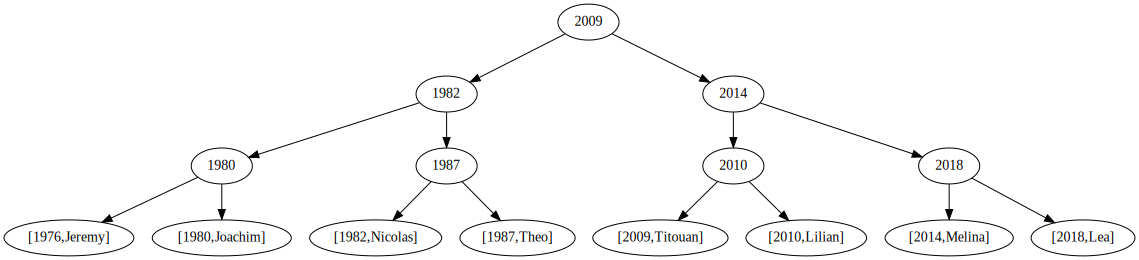

In [9]:
arbol.insert(2018,"Lea")

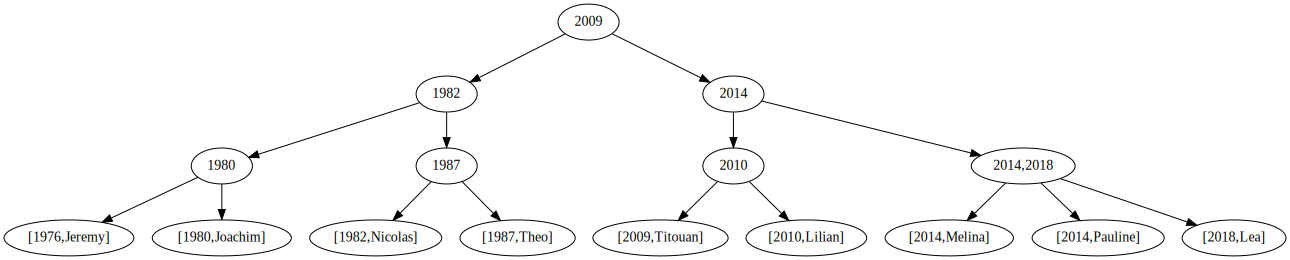

In [10]:
arbol.insert(2014,"Pauline")